<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#결정 트리(Decision Tree)
### : ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 Tree 기반의 분류 규칙을 만듬

# 결정트리의 구조
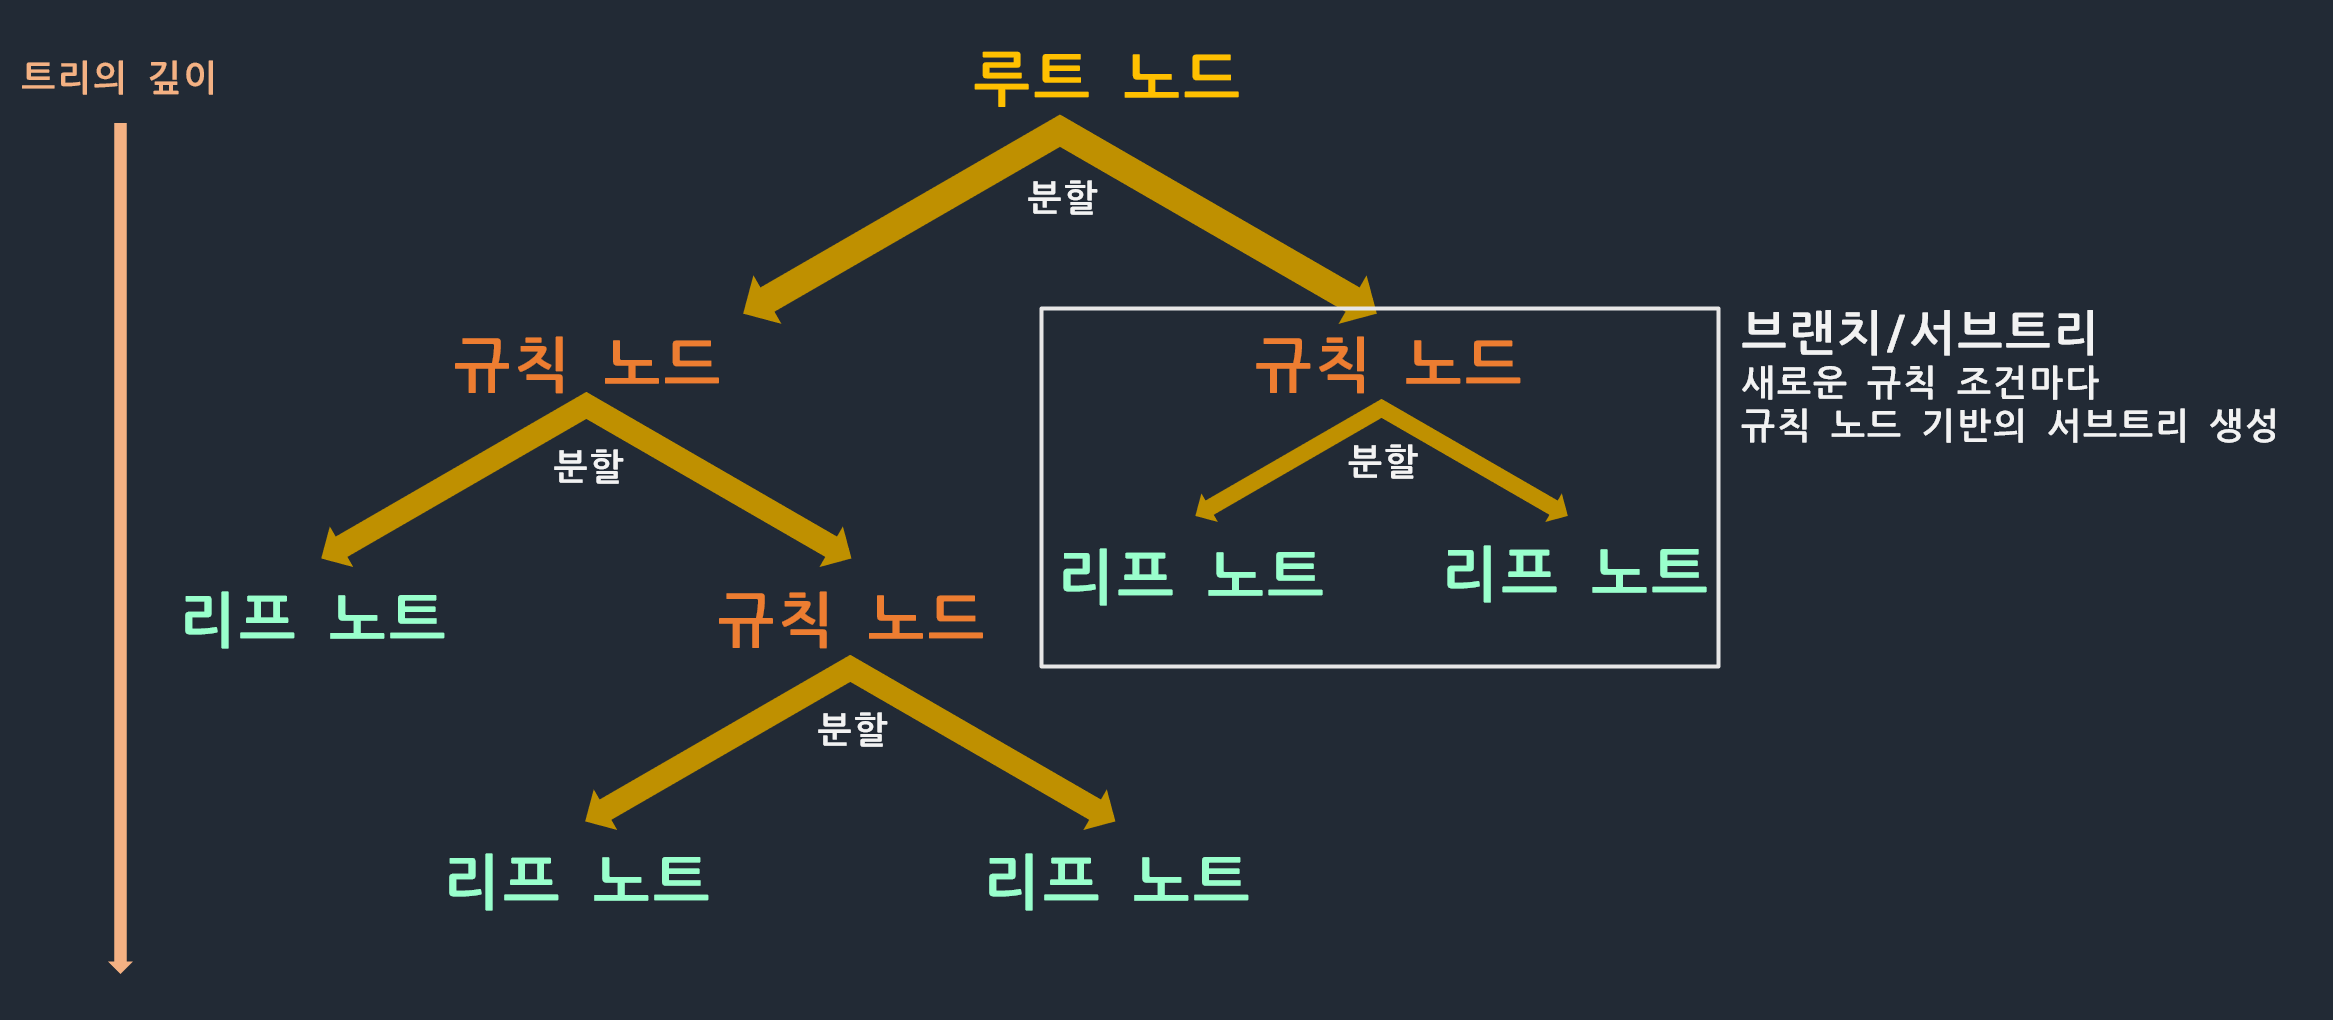

- 루트 노드(Root Node) :최상단 노드
- 규칙 노드 : 규칙 조건
- 리프 노드(Leaf Node) : 결정된 클래스 값
<strong>새로운 규칙 조건마다 서브트리(SubTree) 생성</strong>

<strong>*많은 규칙이 있다는 것은 분류를 결정하는 방식이 더욱 복잡해지고 즉 트리의 깊이가 깊어지는 것인데 이는 과적합(Overfitting)으로 이어지기 쉬움*</strong>

# 정보의 균일도를 측정하는 대표적인 방법
- 정보 이득(Information Gain) : 엔트로피를 기반
  - 엔트로피 : 주어진 데이터 집합의 혼잡도를 의미
    - 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
  - 정보 이득 지수 = 1 - 엔트로피 지수
  - **결정트리는 정보 이득 지수로 분할 기준을 정함 즉, 정보 이득이 높은 속성을 기준으로 분할**

- 지니(Gini) 계수 : 경제학에서 불평등 지수를 나타낼 때 사용
  - 0이 가장 평등하고 1로 갈수록 불 평등
  - **데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우 불평등**
  - **다양성이 낮을 수록 균일도가 높다, 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성을 기준으로 분할**

# 결정 트리 모델의 특징
- '균일도'라는 규칙을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
- 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
- 하지만 과적합으로 정확도가 떨어질 수 있다.
  - 트리의 깊이를 제한 하는 튜닝이 필요

# 결정 트리 파라미터
사이킷런은 DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀) 클래스를 제공
사이킷런 결정 트리의 구현은 CART(Classification And Regression Trees) 알고리즘 기반
- CART는 분류, 회귀 둘다 사용할 수 있는 알고리즘

## 파라미터(Parameters)
- min_samples_split
  - 노드를 분할하기 위한 최소한의 샘플 데이터 수 
    - 과적합을 제어하는데 사용
  - default = 2로 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf
  - 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    - 과적합 제어 용도
  - 비대칭적(Imbalanced)데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
- max_features 
  - 최적의 분할을 위해 고려할 최대 피처 개수
  - default = None
    - 데이터 세트의 모든 피처를 사용해 분할
  - int형으로 지정하면 대상 피처의 개수
  - float형으로 지정하면 전체 피처 중대상 피처의 퍼센트
  - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수) 즉 $\sqrt{전체피처개수}$ 만큼 선정
  - 'log'는 전체 피처 중 log2(전체 피처 개수)
  - 'None'은 전체 피처 선정
- max_depth
  - 트리의 최대 깊이를 규정
  - defalut = None
    - None으로 설정시 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할 하거나  노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 게속 깊이를 증가 시킴
  - 적절한 값으로 제어 필요
- max_leaf_nodes
  - 리프 노드의 최대 개수


# 결정 트리 모델의 시각화
**Graphviz 패키지를 사용하여 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는 지 시각적으로 보여줌**

사이킷런은 export_graphviz() API를 제공
export_graphviz의 함수 인자로 Estimator, 피처의 이름 리스트, 레이블 이름 리스트 전달



In [ ]:
#붖꽃 데이터 세트를 활용
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier()

#붖꽃 데이터를 로드하고, 학습과 테스트 데이터 세트로 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

#DecisionTreeCalssifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names= iris.target_names, feature_names = iris.feature_names, impurity=True, filled=True)

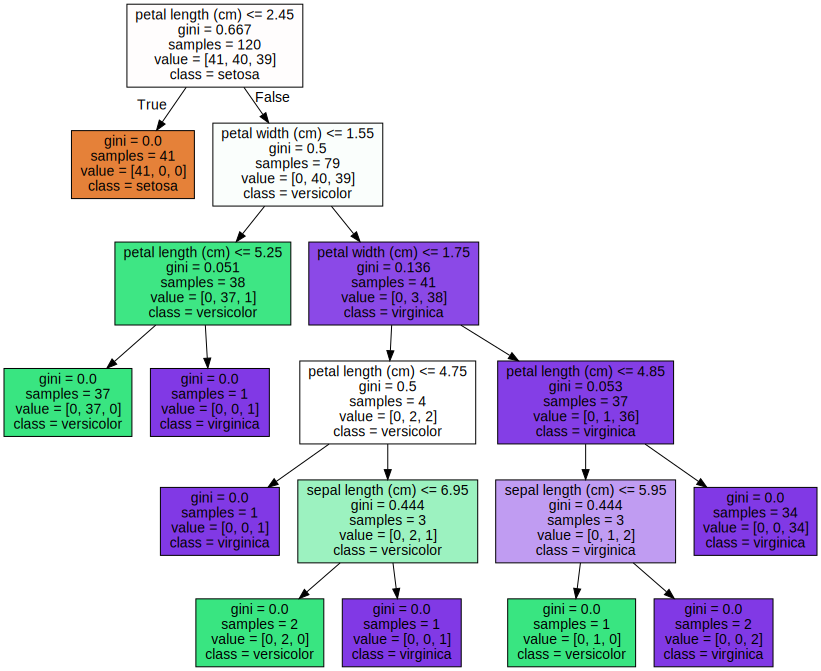

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

각 노드를 확인해 보면
**patel length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건**
만약 이 조건이 없다면 **리프 노드**이다.
**gini는 다음의 value = [ ]로 주어진 데이터 분포에서의 지니 계수**이다.  
**value = [ ]는 클래스 값 기반의 데이터 건수** 
- 붖꽃 데이터 세트는 클래스 값이 0, 1, 2로 각 품종을 가리킴
  - 0 : Setosa  
  - 1 : Versicolor
  - 2 : Virginica
  
만약 value = [41, 40, 39]라면 클래스의 값 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성되었다는 의미

주황색은 Setosa, 초록색은 Versicolor, 보라색은 Virginica 레이블을 나타냄  
색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속한 샘플 데이터가 많다는 의미

### max_depth = 3 제약

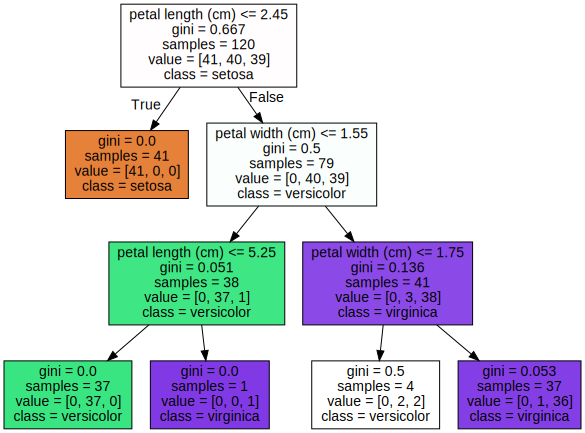

In [ ]:
#DecisionTreeClassifier 생성 max_depth = 3 
dt_clf = DecisionTreeClassifier(max_depth = 3)

#DecisionTreeCalssifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree_max_depth_3.dot', class_names= iris.target_names, feature_names = iris.feature_names, impurity=True, filled=True)

#위에서 생성된 tree_max_depth_3.dot 파일을 Graphviz가 읽어서 시각화
with open('tree_max_depth_3.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

max_depth에 따라 루트 노드를 제외하여 깊이가 3이 된것을 확인할 수 있다.  
깊이가 줄어들면서 더 간단한 결정 트리가 된다.

### min_samples_split = 4 제약

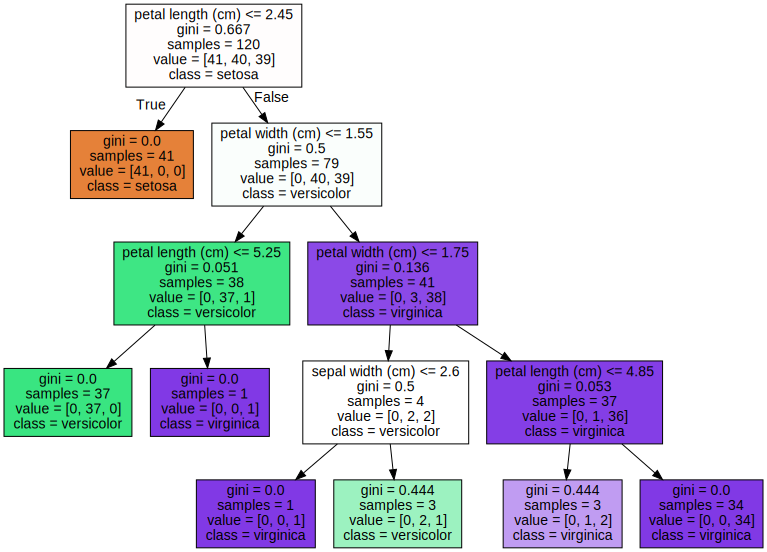

In [ ]:
#DecisionTreeClassifier 생성 max_depth = 3 
dt_clf = DecisionTreeClassifier(min_samples_split = 4)

#DecisionTreeCalssifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree_min_samples_split_4.dot', class_names= iris.target_names, feature_names = iris.feature_names, impurity=True, filled=True)

#위에서 생성된 tree_max_depth_3.dot 파일을 Graphviz가 읽어서 시각화
with open('tree_min_samples_split_4.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

min_samples_split = 4 제약에 따라 자식 규칙 노드를 분할해 만들기 위한 최소한의 데이터 수가 제약이 됨  
value = [0, 3, 1], [0, 1, 2]를 가진 노드를 보면 더 이상 분할되지 않고 리프 노드가 되었음  
최소한의 데이터 수가 3개 밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않았음을 알 수 있다.


### min_samples_leaf = 4 제약

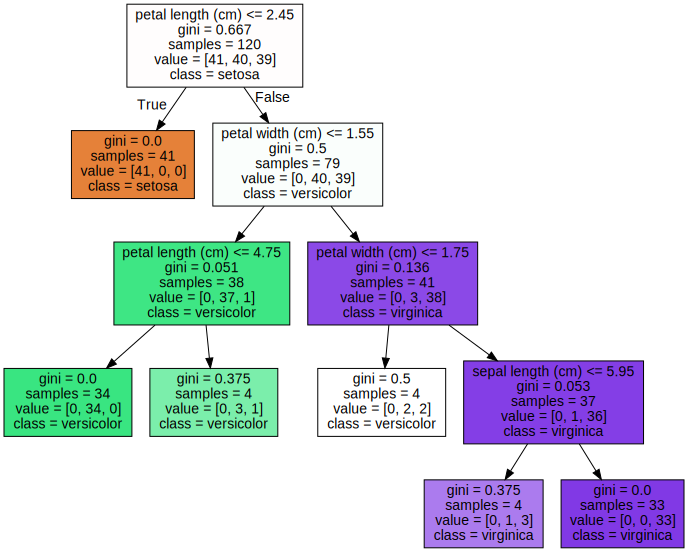

In [ ]:

#DecisionTreeClassifier 생성 max_depth = 3 
dt_clf = DecisionTreeClassifier(min_samples_leaf = 4)

#DecisionTreeCalssifier 학습
dt_clf.fit(X_train, y_train)

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree_min_samples_leaf_4.dot', class_names= iris.target_names, feature_names = iris.feature_names, impurity=True, filled=True)

#위에서 생성된 tree_max_depth_3.dot 파일을 Graphviz가 읽어서 시각화
with open('tree_min_samples_leaf_4.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

min_samples_leaf <= 지정값의 기준을 만족하면 리프노드가 될 수 있음  
value = [0, 1, 3], [0, 3, 1], [0, 2, 2]을 가진 노드를 보면 위 조건을 만족하여 리프노드가 되었음

#피처의 중요도(feature_importance_)
값이 높을 수록 피처의 중요도가 높다는 의미

Feature Importance : 
 [0.025 0.017 0.538 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.017
petal length (cm) : 0.538
petal width (cm) : 0.42


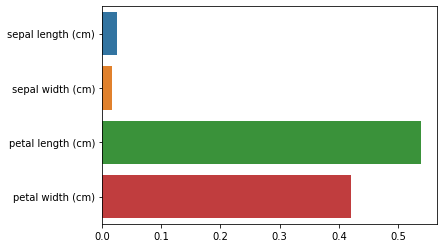

In [ ]:
import seaborn as sns
import numpy as np

#DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

#feature importance 추출
print(f"Feature Importance : \n {np.round(dt_clf.feature_importances_,3)}")
#feture 별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
  print(f"{name} : {np.round(value, 3)}")
#feature importance 시각화
sns.barplot(x = dt_clf.feature_importances_, y=iris.feature_names)

#결정 트리 과적합(Overfitting)
결정트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지, 이로 인한과적한 문제를 시각화  

사이킷런의 make_classification() 함수를 사용하여 쉽게 분류를 위한 테스트 데이터를 만듬

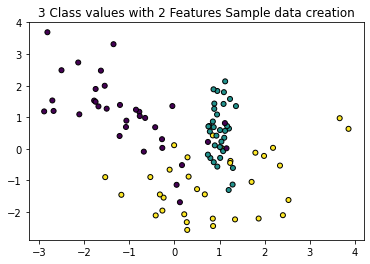

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")
#2차원 시각화를 위해서 피처는 2개 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features,  y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#산점도 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
plt.show()

3개의 클래스 값 구분은 색으로 되어있음  
주어진 데이터를 기반으로 결정트리를 학습을 진행  

visualize_boundary() 유틸리티 함수는 모델이 클래스 값을 예측하는 결정 기준을 생상과 경계로 나누어줌  
2개의 모델을 만들어 비교

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

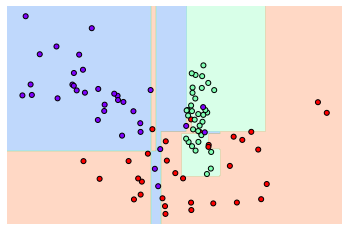

In [ ]:
#첫번째 모델은 디폴드 옵션을 사용
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

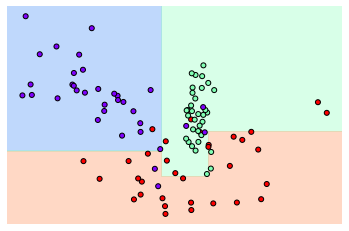

In [ ]:
#두번째 모델은 min_samples_leaf = 6으로 제약
dt_clf =DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

하이퍼 파라미터를 조정을 하니 일부 이상치 데이터에 크게 반응 하지 않고 일반화된 불류 규칙에 따라 분류 되었음을 확인할 수 있다.  